In [1]:
import pandas as pd
import numpy as np

c:\Users\AKSHAT SHAW\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("pit_edit_5.csv", sep=",", encoding="utf-8")

In [3]:
df.head()

,No.,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,...,Test Solution,[Cl-] M,pH,Test Method,Scan Rate mV/s,Heat treatment,Microstructures,Comments,Reference,Material class
0,1.0,69.71,18.0,10.0,NaN,0.0,0.0,0.0,0.03,1.0,...,"300 ppm NaCl, pH 7.8",0.0051,7.8,Potentiodynamic Polarization with exposed area...,0.10,NaN,NaN,S30403 (304L),49,Fe Alloy
1,2.0,69.71,18.0,10.0,NaN,0.0,0.0,0.0,0.03,1.0,...,"500 ppm NaCl, pH 7.8",0.0086,7.8,Potentiodynamic Polarization with exposed area...,0.10,NaN,NaN,S30403 (304L),49,Fe Alloy
2,3.0,69.71,18.0,10.0,NaN,0.0,0.0,0.0,0.03,1.0,...,"1000 ppm NaCl, pH 7.8",0.0171,7.8,Potentiodynamic Polarization with exposed area...,0.10,NaN,NaN,S30403 (304L),49,Fe Alloy
3,4.0,69.71,18.0,10.0,NaN,0.0,0.0,0.0,0.03,1.0,...,"5000 ppm NaCl, pH 7.8",0.0856,7.8,Potentiodynamic Polarization with exposed area...,0.10,NaN,NaN,S30403 (304L),49,Fe Alloy
4,5.0,69.71,18.0,10.0,NaN,0.0,NaN,0.0,0.03,1.0,...,Seawater Natural,0.5460,8.2,Potentiodynamic Polarization with exposed area...,0.10,NaN,NaN,S30403 (304L),49,Fe Alloy


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 810 entries, 0 to 809
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No.              810 non-null    float64
 1   Fe               810 non-null    float64
 2   Cr               805 non-null    float64
 3   Ni               788 non-null    float64
 4   Mo               779 non-null    float64
 5   W                795 non-null    float64
 6   N                274 non-null    float64
 7   Nb               772 non-null    float64
 8   C                368 non-null    float64
 9   Si               357 non-null    float64
 10  Mn               329 non-null    float64
 11  Cu               156 non-null    float64
 12  P                189 non-null    float64
 13  S                199 non-null    float64
 14  Al               734 non-null    float64
 15  V                810 non-null    float64
 16  Ta               810 non-null    float64
 17  Re              

In [5]:
df['Epit, mV (SCE)'][395]

800.0

In [6]:
df.shape

(810, 37)

In [7]:
num = df.select_dtypes(include="number").columns
cat = df.select_dtypes(exclude="number").columns

In [8]:
num , cat

(Index(['No.', 'Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn', 'Cu',
        'P', 'S', 'Al', 'V', 'Ta', 'Re', 'Ce', 'Ti', 'Co', 'B', 'Mg', 'Y', 'Gd',
        'Epit, mV (SCE)', 'Test Temp (C)', '[Cl-] M', 'pH', 'Reference'],
       dtype='object'),
 Index(['Test Solution', 'Test Method', 'Scan Rate mV/s', 'Heat treatment',
        'Microstructures', 'Comments', 'Material class'],
       dtype='object'))

In [9]:
df[num].isnull().sum()

No.                 0
Fe                  0
Cr                  5
Ni                 22
Mo                 31
W                  15
N                 536
Nb                 38
C                 442
Si                453
Mn                481
Cu                654
P                 621
S                 611
Al                 76
V                   0
Ta                  0
Re                  0
Ce                  0
Ti                  5
Co                  0
B                   0
Mg                  0
Y                   0
Gd                 12
Epit, mV (SCE)     50
Test Temp (C)      83
[Cl-] M             0
pH                 48
Reference           0
dtype: int64

## Replacing the N/A in the alloy percentage to 0

In [10]:
alloy_comp = ['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn', 'Cu',
        'P', 'S', 'Al', 'V', 'Ta', 'Re', 'Ce', 'Ti', 'Co', 'B', 'Mg', 'Y', 'Gd']

In [11]:
df[alloy_comp] = df[alloy_comp].fillna(0)

In [12]:
df[num].isnull().sum()

No.                0
Fe                 0
Cr                 0
Ni                 0
Mo                 0
W                  0
N                  0
Nb                 0
C                  0
Si                 0
Mn                 0
Cu                 0
P                  0
S                  0
Al                 0
V                  0
Ta                 0
Re                 0
Ce                 0
Ti                 0
Co                 0
B                  0
Mg                 0
Y                  0
Gd                 0
Epit, mV (SCE)    50
Test Temp (C)     83
[Cl-] M            0
pH                48
Reference          0
dtype: int64

In [21]:
df1= df.copy()

In [22]:
df1.replace(["NA"], np.nan, inplace=True)

In [29]:
df1['Scan Rate mV/s'] = df1['Scan Rate mV/s'].replace("20mV steps by manual increament", np.nan).astype(float)

In [30]:
df1['Test Temp (C)']= df1['Test Temp (C)'].fillna(df1['Test Temp (C)'].mean())
df1['Scan Rate mV/s']=df1['Scan Rate mV/s'].fillna(df1['Scan Rate mV/s'].mean())

c:\Users\AKSHAT SHAW\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


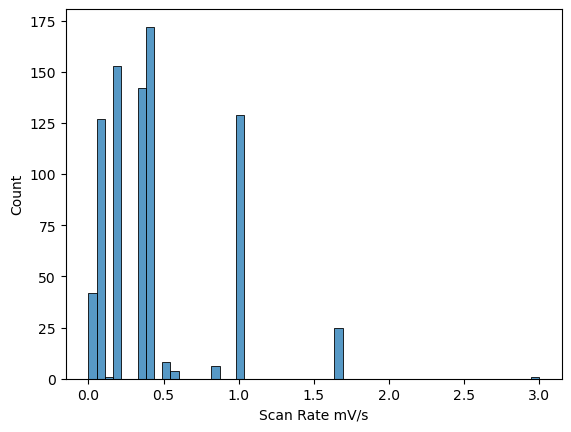

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df1['Scan Rate mV/s'])
plt.show()

c:\Users\AKSHAT SHAW\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


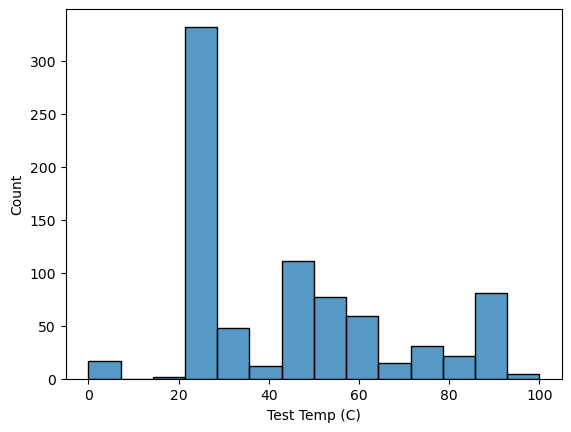

In [43]:
sns.histplot(df1['Test Temp (C)'])
plt.show()

In [44]:
df1.dropna(subset= ['Epit, mV (SCE)', 'pH'],inplace = True)

In [45]:
df1[num].isnull().sum()

No.               0
Fe                0
Cr                0
Ni                0
Mo                0
W                 0
N                 0
Nb                0
C                 0
Si                0
Mn                0
Cu                0
P                 0
S                 0
Al                0
V                 0
Ta                0
Re                0
Ce                0
Ti                0
Co                0
B                 0
Mg                0
Y                 0
Gd                0
Epit, mV (SCE)    0
Test Temp (C)     0
[Cl-] M           0
pH                0
Reference         0
dtype: int64

In [46]:
df1.shape

(712, 37)

In [54]:
num = df1.select_dtypes(include="number").columns
cat = df1.select_dtypes(exclude="number").columns

In [55]:
df1[cat] = df1[cat].fillna("Not Available")

In [56]:
df1[cat].isnull().sum()

Test Solution      0
Test Method        0
Heat treatment     0
Microstructures    0
Comments           0
Material class     0
dtype: int64

In [59]:
df1.drop(columns=['Reference', 'No.'], inplace=True)

In [64]:
import sklearn
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()

In [66]:
df1['Material class'] = le.fit_transform(df1['Material class'])

In [68]:
df1.to_csv("pit_clean_2.csv", index=False)

# Text pre-processing

In [72]:
data = pd.read_csv("pit_clean_2.csv")


In [73]:
txt_col = data.select_dtypes(include="object").columns

In [74]:
txt_col

Index(['Test Solution', 'Test Method', 'Heat treatment', 'Microstructures',
       'Comments'],
      dtype='object')

In [78]:
df1['combine_text'] = f"<S> Test Solution: {df1['Test Solution']} || Test Method: {df1['Test Method']} || Heat treatment: {df1['Heat treatment']} || Microstructures: {df1['Microstructures']} || Comments: {df1['Comments']} <\S>"

In [80]:
df1.to_csv("pit_cleaned_final.csv", index=False)